# Bank Marketing Campaign

### Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## **Business Problem Understanding**

### Context

Dalam pasar yang semakin kompetitif di sektor perbankan, bank menghadapi tantangan besar dalam mempertahankan nasabah deposito berjangka yang sudah ada dan menarik nasabah baru untuk memperoleh suku bunga deposito yang tinggi. Sementara persaingan antar bank terus meningkat, bank juga harus menjaga keuntungan dan pertumbuhan portofolio mereka. Salah satu cara untuk mendapatkan pelanggan baru adalah dengan melakukan *Marketing Campaign.

Bank melakukan *Marketing Campaign* melalui panggilan telepon dimana hasilnya dalam bentuk dataset. Tujuannya di sini adalah untuk menerapkan *Machine Learning* untuk menganalisis dataset dan menemukan strategi paling efektif yang akan membantu bank dalam *campaign* berikutnya untuk membujuk lebih banyak nasabah agar berlangganan deposito berjangka. Oleh karena itu, Bank ingin mengetahui nasabah mana saja yang tertarik deposit dan tidak agar Marketing Campaign ini bisa langsung ditujukkan ke target market secara langsung dan efisien.

Target:
0 : Tidak menaruh deposit
1 : Menaruh deposit



### Problem Statement

Profitabilitas bank bergantung pada deposito jangka panjang. Untuk mempermudah dan efisiensi biaya maupun waktu dari Marketing Campaign diperlukan sebuah sistem untuk memprediksi nasabah mana saja yang tertarik atau tidak tertarik dengan produk deposito. Sehingga pendekatan dan tujuan campaign tersebut bisa langsung dirasakan dan sesuai dengan nasabah yang potensial untuk melakukan deposito. 


### Goals

Bank mendapatkan customer yang ingin melakukan deposit dengan memaksimalkan marketing campaign. Salah satu langkah yang diperlukan adalah mengurangi cost pulsa untuk menelepon semua nasabah dan meningkatkan efisiensi waktu agar telemarketing tidak perlu menghubungi semua nasabah. Caranya adalah dengan mengidentifikasi nasabah dengan kriteria dan target yang sesuai agar dapat melalukan deposit. Oleh karena itu, dengan bantuan Machine Learning dibuatkan suatu sistem untuk melakukan prediksi dengan data yang tersedia, mengidentifikasi nasabah yang potensial dan tidak potensial untuk melakukan deposito.


### Analytic Approach

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan kandidat nasabah yang potensial untuk deposito atau tidak.

Selanjutnya, dilanjutkan dengan membangun model klasifikasi yang akan membantu bank untuk dapat memprediksi probabilitas seorang kandidat nasabah yang akan/ingin melakukan deposit atau tidak.


### Metric Evaluation

Type 1 error (False Positive) akan menunjukkan pemborosan waktu dan biaya campaign untuk nasabah yang sebenarnya tidak berpotensi menaruh deposit, dan Type 2 error (False Negative) menunjukkan kehilangan nasabah potensial. Metrik yang tepat untuk model machine learning keadaan ini adalah F1 score.

F1 score cocok digunakan dalam situasi untuk mencapai keseimbangan antara presisi dan recall, terutama ketika kelas-kelas dalam data tidak seimbang. Dalam case ini, Kita ingin menghindari kedua jenis kesalahan, baik False Positive maupun False Negative. F1 score memberikan ukuran kinerja yang baik karena memperhitungkan kedua jenis kesalahan tersebut.

Dengan demikian, dalam kasus ini, Kita ingin memaksimalkan F1 score untuk memastikan bahwa model memiliki presisi yang tinggi dalam mengidentifikasi calon nasabah yang berpotensi menaruh deposit, sambil meminimalkan jumlah calon nasabah potensial yang terlewatkan (False Negative) dan menghindari pengeluaran yang tidak perlu pada calon nasabah yang sebenarnya tidak potensial (False Positive).


## Data Understanding
Dataset: https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW

Terdapat 11 kolom dari dataset:

Note : 
- Sebagian besar fitur memiliki jenis kategorikal (Nominal dan Ordinal), beberapa dengan kardinalitas tinggi
- Setiap baris data merepresentasikan informasi nasabah yang sudah pernah menaruh deposit dimasa lalu

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| age | Numeric | Umur nasabah |
| job | Text | Pekerjaan nasabah |
| balance | Float | Jumlah uang pada rekening nasabah |
| housing | Text | Apakah nasabah memiliki cicilan rumah |
| loan | Text | Apakah nasabah memiliki hutang |
| contact | Text | Alat komunikasi yang digunakan oleh telemarketimg untuk menghubungi |
| month | Text | Bulan terakhir nasabah dihubungi oleh telemarketing |
| campaign | Numeric | Jumlah kontak yang dilakukan selama kampanye |
| pdays | Numeric | Jumlah hari sejak hari terakhir nasabah dihubungi oleh telemarketing |
| poutcome | Text | Hasil dari kampanye sebelumnya |
| deposit | Text | Apakah customer melakukan deposit atau tidak |

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## DATA CLEANING

In [38]:
# lOADING DATA
df = pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [39]:
df[df['pdays']==-1]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


Dengan value pdays = -1 terlihat bahwa terdapat 5817 nasabah dari dataset tersebut, pdays ini merupakan waktu terakhir sejak telemarketing menghubungi nasabah.

In [5]:
# melihat unique data pada masing-masing kolom
def Check (x):
    Type = []
    Count = []
    Sample = []
    MissVal = []
    for i in x.columns:
        Sample.append(x[i].unique()[:5])
        Count.append(x[i].nunique())
        Type.append(x[i].dtype)
        MissVal.append(x[i].isna().sum())
    check = pd.DataFrame({
        'Columns' : df.columns,
        'Dtype' : Type,
        'Nunique' : Count,
        'Missing Value' : MissVal,
        'Unique' : Sample
    })
    return check

In [6]:
Check(df)

,Columns,Dtype,Nunique,Missing Value,Unique
0,age,int64,75,0,"[55, 39, 51, 38, 36]"
1,job,object,12,0,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,0,"[1662, -3058, 3025, -87, 205]"
3,housing,object,2,0,"[no, yes]"
4,loan,object,2,0,"[no, yes]"
5,contact,object,3,0,"[cellular, telephone, unknown]"
6,month,object,12,0,"[jun, apr, may, nov, jan]"
7,campaign,int64,32,0,"[2, 3, 1, 4, 5]"
8,pdays,int64,422,0,"[-1, 352, 21, 91, 186]"
9,poutcome,object,4,0,"[unknown, other, failure, success]"


In [7]:
# mengecek data kosong
df.isnull().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [8]:
# mengecek data kosong
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [10]:
# mengecek duplikat data
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


data duplikat diabaikan karena kolom yang ada pada data merupakan kolom yang memungkinkan untuk seseorang memiliki data yang sama (tidak ada data NIK/nama) dan dianggap sesuai dengan kondisi aktual

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [12]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


Dari hasil tersebut terlihat ada beberapa outliers pada semua kolom numerikal, namun dapat diabaikan dan tetap digunakan untuk pembuatan model karena dianggap sesuai dengan kondisi aktual

The figure layout has changed to tight
The figure layout has changed to tight


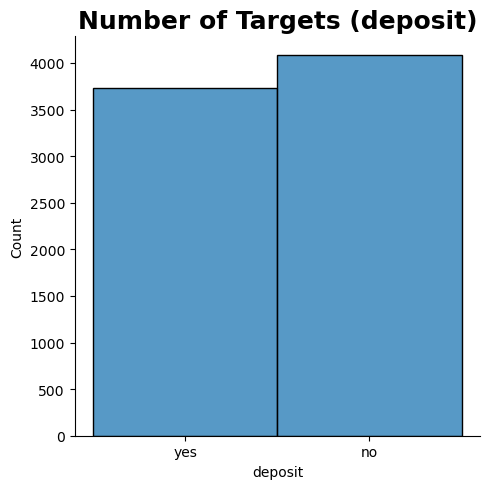

In [45]:
sns.displot(data=df, x='deposit')
plt.title("Number of Targets (deposit)", size=18, weight='bold')
plt.tight_layout()
plt.show()

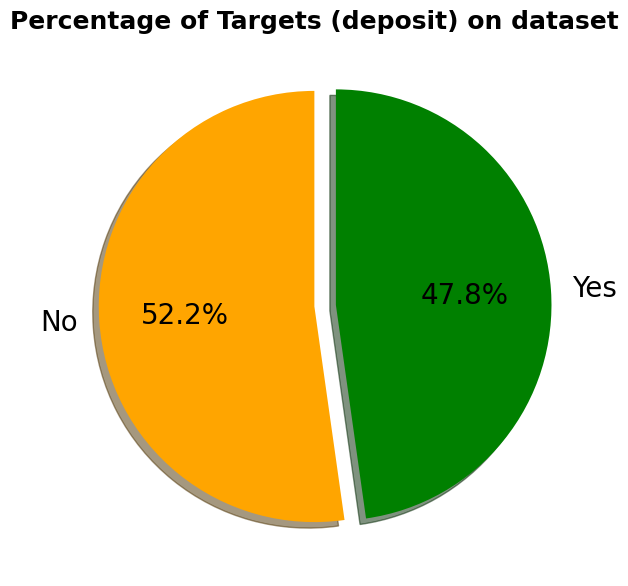

In [46]:
plt.figure(figsize=(7,7))
plt.title("Percentage of Targets (deposit) on dataset", size=18, weight='bold')
plt.pie(df['deposit'].value_counts(), explode=(0,0.1), labels=['No', 'Yes'], colors=["orange","green"], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

plt.show()

Dari diagram tersebut terlihat persentase yang tidak terlalu berbeda significant antara perbandingan depositor antara 'Yes' dan 'No' atau bisa dikatakan relatif seimbang, sehingga tidak diperlukan treatment data imbalance.

The figure layout has changed to tight
The figure layout has changed to tight
The figure layout has changed to tight


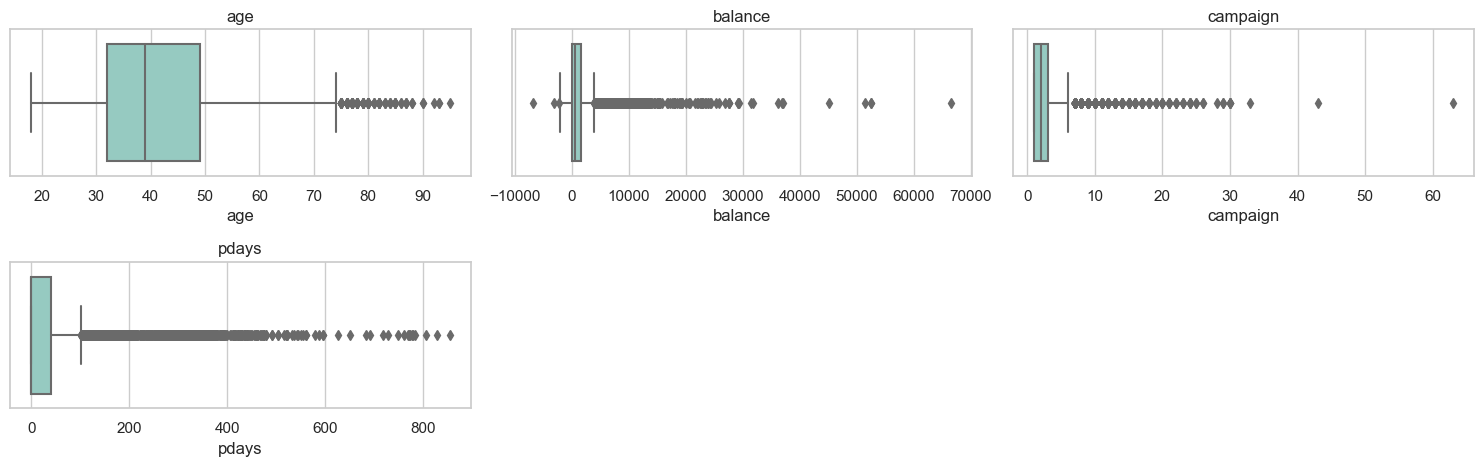

In [49]:
# feature numerical pada data
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

Dapat terlihat bahwa:
1. Distribusi untuk kolom age, balance, campaign dan pdays adalah right skewed distribution
2. Terdapat outlier pada kolom age, balance, campaign, pdays
3. Umur nasabah > 70 tahun dianggap outlier
4. Outlier tidak kita drop pada kolom age balance campaign dan pdays dikarenakan hal berikut:
   - Umur lebih dari 70 tahun dan nasabah ini melakukan deposit adalah wajar karena banyak nasabah yang berumur tinggi memiliki deposit atau menyimpan uang untuk hari tua
   - Balance yang bervariasi ada yang tinggi sekali dan rendah sekali merupakan hal yang wajar tergantung dari jumlah uang yang ingin disimpan oleh nasabah dalam rekening, ataupun jumlah hutang yang dimiliki oleh nasabah.
   - Jumlah campaign yang rendah maupun tinggi adalah hal yang wajar, Biasanya nasabah yang memiliki potensi tinggi akan melakukan deposit akan diberikan marketing campaign yang sangat sering ataupun bahkan terus menerus dari waktu ke waktu
   - Jumlah waktu sejak marketing campaign terakhir ada yang sampai > 800 merupakan hal yang wajar. Hal ini bisa menjadi salah satu kelalaian dari tim telemarketing yang terlewat untuk menghubungi nasabah ataupun nasabah ini dianggap pasti akan melakukan deposit atau dianggap bukan nasabah yang potensial jadi tidak perlu dihubungi dalam waktu dekat.

In [52]:
# Mengelompokkan data bedasarkan job dan deposit
grouped_data = df.groupby(['job', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset index
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='job', y=['yes_percentage', 'no_percentage'],
             title='Deposit Outcome bedasarkan job', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()

Ternyata yang memiliki persentase melakukan deposit paling banyak adalah pelajar, pensiunan dan pengangguran sedangkan yang memiliki persentase tidak melakukan deposit yang paling besar adalah services, karyawan/buruh, dan pembantu rumah tangga. Hal ini bisa terjadi dikarenakan pelahar mendapatkan dana simpanan yang disiapkan orangtuanya untuk pendidikan anak, lalu para pensiunan mendapatkan dana simpanan dari dana pensiun dan para pengangguran mendapatkan simpanan hasil dari dana pesangon.

Selanjutnya kita ingin melihat apakah pekerjaan nasabah mempengaruhi faktor dilakukannya deposito atau tidak. Kita akan menggunakan chi square test karena data yang akan digunakan adalah data kategorikal dengan kategorikal

In [56]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['job'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'job' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel")

Statistik chi-square: 265.05104430193893
Nilai p: 1.955571687693059e-50
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'job' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [57]:
# Mengelompokkan data bedasarkan bulan dan deposit
grouped_data = df.groupby(['month', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset index
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='month', y=['yes_percentage', 'no_percentage'],
             title='Deposit Outcome bedasarkan Month', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()

Dari data terlihat bahwa nasabah memiliki pola paling banyak nasabah deposit di bulan maret, oktober, september dan desember. Dan pada bulan Mei nasabah sangat sedikit melakukan deposit. Maka kita juga perlu melakukan chi square test untuk menguji apakah bulan mempengaruhi nasabah untuk melakukan deposit.

In [58]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['month'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'month' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'month' dan 'deposit'")

Statistik chi-square: 719.0561594130388
Nilai p: 4.429293819523976e-147
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'month' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [59]:
# Mengelompokkan data bedasarkan housing dan deposit
grouped_data = df.groupby(['housing', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset the index 
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='housing', y=['yes_percentage', 'no_percentage'],
             title='Deposit Outcome bedasarkan housing', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()

Nasabah yang tidak memiliki cicilan rumah cenderung untuk melakukan deposit.
Kita juga akan melakukan chi square test untuk menguji apakah ada hubungan yang signifikan antara housing dan deposit

In [61]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['housing'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'housing' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'housing' dan 'deposit'")

Statistik chi-square: 347.8034656184665
Nilai p: 1.2748829978660184e-77
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'housing' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [62]:
# Mengelompokkan data bedasarkan loan dan deposit
grouped_data = df.groupby(['loan', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset the index 
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='loan', y=['yes_percentage', 'no_percentage'],
             title='Deposit bedasarkan loan', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()

Dari diagram tersebut terlihat bahwa Nasabah yang tidak memiliki hutang (loan) cenderung untuk melakukan deposit.
Kita juga akan melakukan chi square test untuk menguji apakah ada hubungan yang signifikan antara loan dan deposit

In [63]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['loan'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'loan' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'loan' dan 'deposit'.")

Statistik chi-square: 113.3461672779847
Nilai p: 1.812085210636521e-26
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'loan' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [64]:
# Mengelompokkan data bedasarkan poutcome dan deposit
grouped_data = df.groupby(['poutcome', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase deposit 
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset index
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='poutcome', y=['yes_percentage', 'no_percentage'],
             title='Deposit bedasarkan poutcome', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')


fig.show()

Dari diagram tersebut dapat dilihat apakah campaign sebelumnya berhasil atau tidak. Ternyata marketing campaign berhasil dilakukan dengan persentase 91.45% dari total total keseluruhan nasabah dengan marketing campaign dengan kategori 'success' melakukan deposit. 

Kita juga akan melakukan chi square test untuk menguji apakah ada hubungan yang signifikan antara poutcome (hasil dari campaign sebelumnya) dan deposit

In [65]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['poutcome'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'poutcome' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel 'poutcome' dan 'deposit'.")

Statistik chi-square: 717.6649966291686
Nilai p: 3.1012079433597082e-155
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'poutcome' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [66]:
# Mengelompokkan data berdasarkan contact dan deposit
grouped_data = df.groupby(['contact', 'deposit'])['deposit'].count().unstack()

# Menghitung persentase
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data['yes_percentage'] = grouped_data['yes'] / grouped_data['total'] * 100
grouped_data['no_percentage'] = grouped_data['no'] / grouped_data['total'] * 100

# Reset indeks
grouped_data = grouped_data.reset_index()

# Membuat stacked bar plot
fig = px.bar(grouped_data, x='contact', y=['yes_percentage', 'no_percentage'],
             title='Deposit Outcome based on contact', barmode='stack')

# Set y-axis label
fig.update_yaxes(title_text='Percentage')

fig.show()

Dari data tersebut terlihat bahwa jenis alat komunikasi yang digunakan oleh telemarketing untuk menghubungi nasabah paling banyak mendapatkan nasabah mau melakukan deposit adalah saat nasabah dihubungi melalui handphone atau telepon rumah. 

Kita akan menguji apakah ada hubungan yang signifikan antara contact dengan deposit dengan menggunakan uji chi square test

In [67]:
from scipy.stats import chi2_contingency
import pandas as pd

# Membuat tabel kontingensi
tabel_kontingensi = pd.crosstab(df['contact'], df['deposit'])

# Melakukan uji chi-square
statistik_chi2, p_value, _, _ = chi2_contingency(tabel_kontingensi)

# Menampilkan hasil
print("Statistik chi-square:", statistik_chi2)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'contact' dan 'deposit'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat hubungan yang signifikan antara variabel'contact' dan 'deposit'.")

Statistik chi-square: 554.5324403549382
Nilai p: 3.8442405792801014e-121
Hipotesis nol (H0) ditolak. Terdapat hubungan yang signifikan antara variabel 'contact' dan 'deposit'.
Hipotesis alternatif (H1) diterima.


In [68]:
# Subset untuk data kolom numerikal
numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]

# Membuat boxplot
fig = px.box(data_subset, x='age', color='deposit',
                   title='Deposit bedasarkan Age')


fig.show()

Dari boxplot terlihat bahwa nasabah yang melakukan deposit berada di range umur 31-51 tahun.
Dan nasabah paling tua yang melakukan deposit berada di umur 95 tahun.

Karena secara median kedua boxplot mirip, maka akan ditampilkan dalam bentuk barplot

In [69]:
import plotly.express as px
import pandas as pd


numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]
age_categories = ['18-29', '30-39', '40-49', '50-59', '60+']
data_subset['age_category'] = pd.cut(data_subset['age'], bins=[18, 29, 39, 49, 59, 150], labels=age_categories, right=False)

df_count = data_subset.groupby(['age_category', 'deposit']).size().reset_index(name='count')
df_total = df_count.groupby('age_category')['count'].transform('sum')
df_count['percentage'] = (df_count['count'] / df_total) * 100

fig = px.bar(df_count, x='age_category', y='count', color='deposit', barmode='stack',
             title='Deposit Outcome - Age Category')

fig.update_layout(
    yaxis_title='Count',
    legend_title='Deposit'
)

for _, row in df_count.iterrows():
    fig.add_annotation(
        x=row['age_category'],
        y=row['count'],
        text=f'{row["percentage"]:.2f}%',
        showarrow=False,
        font=dict(color='white' if row['count'] < df_count['count'].mean() else 'black')
    )

fig.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13176\3252638597.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Persentase deposit paling banyak adalah nasabah dengan usia diatas 60 tahun sebesar 71,41% dan nasabah muda dengan range umur 18-29 tahun sebesar 60.53%. Deposit paling sedikit merupakan nasabah berusia diantara 30-39 tahun sebesar 54.43%.

Kita akan melakukan uji U-Mann Whitney untuk mengetahui apakah ada perbedaan yang signifikan untuk umur dalan kelompok deposit yes dan no

In [70]:
from scipy.stats import mannwhitneyu

# Mengambil data usia untuk kelompok deposit = 'yes'
age_yes = df[df['deposit'] == 'yes']['age']

# Mengambil data usia untuk kelompok deposit = 'no'
age_no = df[df['deposit'] == 'no']['age']

# Melakukan uji Mann-Whitney U
statistik_U, p_value = mannwhitneyu(age_yes, age_no)

# Menampilkan hasil
print("Statistik U:", statistik_U)
print("Nilai p:", p_value)

# Menampilkan hipotesis
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol (H0) ditolak. Terdapat perbedaan yang signifikan dalam rata-rata usia antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")
    print("Hipotesis alternatif (H1) diterima.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat perbedaan yang signifikan dalam rata-rata usia antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.")

Statistik U: 7620275.0
Nilai p: 0.9589108276387615
Tidak cukup bukti untuk menolak hipotesis nol (H0). Tidak terdapat perbedaan yang signifikan dalam rata-rata usia antara kelompok 'deposit' = 'yes' dan 'deposit' = 'no'.


In [71]:
# Subset data kolom numerikal
numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]

# Membuat boxplot
fig = px.box(data_subset, x='balance', color='deposit',
                   title='Deposit Outcome - Balance')


fig.show()

Nasabah yang deposit memiliki range balance (saldo rekening) yang lebih tinggi yaitu 215-2174. Sedangkan untuk nasabah yang tidak melakukan deposit range balancenya 63-1296.

Nasabah yang memiliki balance yang paling tinggi yaitu 66.653k memilih untuk tidak melakukan deposit

In [72]:
# Subset data untuk numerical columns dan the deposit outcome
numerical_columns = ['age', 'balance', 'campaign', 'pdays']
data_subset = df[['deposit'] + numerical_columns]

# Plotting histogram dengan Plotly Express
fig = px.box(data_subset, x='campaign', color='deposit',
                   title='Deposit bedasarkan Campaign')

# Tampilkan plot
fig.show()

Jumlah campaign untuk kategori deposit yes dan no memiliki range jumlah campaign yang hampir sama.
Nasabah yang diberikan campaign paling banyak yaitu 63 memilih untuk tidak melakukan deposit.

In [73]:
import pandas as pd
import plotly.express as px

# Menyaring data untuk kolom 'campaign' dan 'deposit'
data_subset = df[['deposit', 'campaign']]

# Tentukan batas bin untuk campaign
bin_edges = list(range(1, 71, 10))  # Rentang dari 1 hingga 70 dengan lebar bin 10

# Buat kolom 'campaign_group' menggunakan pd.cut()
data_subset['campaign_group'] = pd.cut(data_subset['campaign'], bins=bin_edges, labels=False, right=False)

# Hitung persentase tiap grup
group_counts = data_subset.groupby(['campaign_group', 'deposit']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# Plot histogram menggunakan Plotly Express
fig = px.bar(group_percentages, x=group_percentages.index, y=['no', 'yes'],
             title='Hasil Deposit - Grup Campaign',
             labels={'x': 'Grup Campaign', 'value': 'Persentase', 'variable': 'Deposit'},
             barmode='stack')

# Tentukan label sumbu x
x_labels = ['{}-{}'.format(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges)-1)]

# Perbarui label sumbu x
fig.update_xaxes(tickvals=list(range(len(x_labels))), ticktext=x_labels)
fig.update_layout(xaxis_title='Rentang Campaign', yaxis_title='Persentase')

# Tampilkan plot
fig.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13176\4273977035.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Semakin banyak campaign untuk produk lain, persentase depositnya menurun untuk deposito berjangka. Jumlah campaign dengan range 1-11 memiliki persentase deposit yang paling tinggi yaitu sebesar 48.329%.

## Define X and Y

X merupakan dataframe df tanpa kolom deposit(yang menjadi target untuk data bank marketing campaign)
y merupakan kolom deposit

In [74]:
X = df.drop(columns=['deposit'])
y = df['deposit']

Kita akan mereplace deposit dengan angka 1 dan tidak deposit dengan angka nol karena model machine learning tidak dapat memproses data kategorikal

In [75]:
y = np.where(y=='yes',1,0)

In [76]:
# ubah y menjadi series dan hitung value countsnya 
y_series = pd.Series(y)
value_counts = y_series.value_counts()
len_value_counts = y_series.value_counts()/len(y_series)
print(value_counts)
print(len_value_counts)

0    4081
1    3732
Name: count, dtype: int64
0    0.522335
1    0.477665
Name: count, dtype: float64


Terdapat 4081 baris dengan value deposit 0 atau nasabah yang tidak melakukan deposit (52,23% target value depositnya 0)
dan 3732 baris dengan value deposit 1 atau nasabah yang deposit (47,76% target value depositnya 1)

## Data Splitting

Kita akan melakukan splitting pada data dengan stratify=y agar distribusi kelas target 0 dan 1 pada data awal dengan distribusi kelas target pada data train dan test seimbang jumlahnya.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

## DATA PREPARATION

In [47]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki. Yang akan kita lakukan adalah :
1. Merubah fitur/kolom `job` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
2. Merubah fitur/kolom `housing` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `loan` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `contact` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `month` menggunakan Ordinal Encoding, karena fitur ini memiliki urutan
6. Merubah fitur/kolom `poutcome` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

In [78]:
#mapping untuk month
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# mapping untuk poutcome
ordinal_mapping  = [
    {'col':'poutcome', 'mapping':{'failure': 1, 'success': 2, 'other': 0, 'unknown': 0}},
    {'col':'month','mapping':month_mapping}
]  #other dan unkown ini dianggap sebagai hal yang sama dengan ordinal mapping : 0 


pipe_ordinal = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(mapping=ordinal_mapping)),
    ('robust',RobustScaler())
])

transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['job', 'contact','loan','housing']),
        ('ordinal', pipe_ordinal, ['poutcome','month']),
        ('robust', RobustScaler(), ['age', 'balance', 'campaign','pdays']),
    ],
    remainder='passthrough'
)

In [79]:
#mencari nama kolom hasil column transformer
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['job', 'contact', 'loan', 'housing']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(mapping=[{'col': 'poutcome',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': failure    1
success    2
other      0
unknown    0
dtype: int64},
                                                                          {'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': jan     1
feb     2
mar     3
apr     4
may     5
jun     6
jul     7
aug     8
sep     9
oct    10
nov    11
dec    12
dtype: int64}])),
                                                 ('robust', RobustScaler())]),
                                 ['poutcome', 'month']),
                                ('robust', RobustScaler(),
                                 ['age', 'balance', 'campaign', 'pdays'])])

In [80]:
#kita akan menyimpan hasil dari column transformer ke dalam X train dan X test 
X_train_prep_df = pd.DataFrame(transformer.transform(X_train))
X_test_prep_df = pd.DataFrame(transformer.transform(X_test))

In [81]:
#kita akan menyimpan nama kolom kategorikal yang telah di encoding dan kolom numerikal yang telah di scailing
col_onehot = transformer.transformers_[0][1].get_feature_names_out()  # Column names untuk OneHotEncoder
col_ordinal = transformer.transformers_[1][2]  # Column names for the ordinal-encoded features
col_robust = transformer.transformers_[2][1].get_feature_names_out()  # Column names for the RobustScaler

In [82]:
#menggabungkan nama dari ketiga kolom 
all_feature = list(col_onehot) + list(col_ordinal) + list(col_robust)

In [83]:
#mengganti kolom kolom pada X train prep dan X test prep dengan nama kolom sesuai dengan tahap yang dilakukan pada Column Transformer
X_train_prep_df.columns = all_feature
X_test_prep_df.columns = all_feature

In [84]:
#menampilkan kolom X train prep dengan nama-nama kolom yang di encoding dan kolom numerikal yang di robust scailing
X_train_prep_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_telephone,contact_unknown,loan_yes,housing_yes,poutcome,month,age,balance,campaign,pdays
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.333333,-0.529412,0.310026,-0.5,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.666667,-0.352941,0.356860,-0.5,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,-1.333333,0.705882,0.050792,-0.5,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.666667,-0.176471,-0.289578,-0.5,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.333333,0.352941,-0.356860,-0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.666667,0.176471,0.397098,-0.5,0.0
6246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.666667,-0.176471,5.437995,0.0,0.0
6247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.666667,1.000000,0.672823,-0.5,0.0
6248,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.000000,0.705882,-0.721636,3.0,0.0


## MODEL SELECTION

In [94]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [97]:
knn = KNeighborsClassifier(n_neighbors = 3)
logreg = LogisticRegression(max_iter = 200, random_state = 2020)
rf = RandomForestClassifier(max_depth = 3, random_state = 2020)
dt = DecisionTreeClassifier(max_depth = 3,random_state = 2020)
xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 2020)

In [98]:
models = [knn, logreg, rf, dt, xgb]
score=[]
rata=[]
std=[]

for i in models:
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    model_cv = cross_val_score(estimator, x_train, y_train, cv = skfold, scoring = 'f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [99]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'], 'f1 score' : rata, 'std dev' : std}).set_index('model').sort_values('f1 score', ascending = False)

,f1 score,std dev
model,,
Logistic Regression,0.482400,0.008324
XGBoost,0.417976,0.011253
KNN,0.293794,0.039533
Random Forest,0.179224,0.182201
Decision Tree,0.013172,0.004597


## MODEL BENCHMARKING: TEST DATA

In [100]:
models = {
    'xgb' : XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 2020),
    'knn' : KNeighborsClassifier(n_neighbors = 3)
}

xgb
              precision    recall  f1-score   support

           0       0.53      0.66      0.59       816
           1       0.49      0.36      0.42       747

    accuracy                           0.52      1563
   macro avg       0.51      0.51      0.50      1563
weighted avg       0.51      0.52      0.51      1563



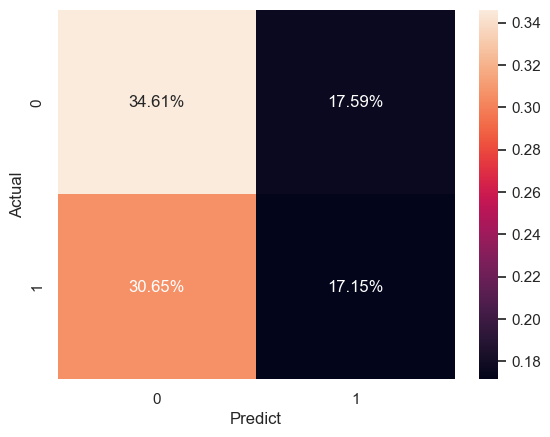

knn
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       816
           1       0.46      0.45      0.45       747

    accuracy                           0.48      1563
   macro avg       0.48      0.48      0.48      1563
weighted avg       0.48      0.48      0.48      1563



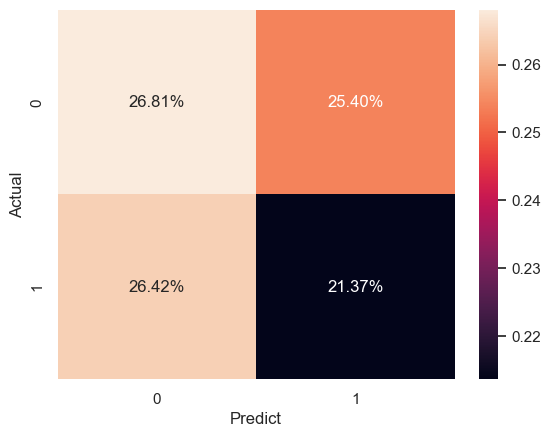

In [101]:
for i, j in models.items():
    estimator = Pipeline([
    ('processing', transformer),
    ('model', j)
    ])
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    print(i)
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot = True, fmt = '.2%')
    plt.xlabel('Predict')
    plt.ylabel('Actual')
    plt.show()

Setelah melihat hasil benchmarking dari data test, score tertinggi didapatkan oleh model XGBoost

## TUNING

Tuning adalah proses di mana parameter atau hyperparameter dari sebuah model atau algoritma dipilih atau disesuaikan untuk meningkatkan performa atau kinerja model tersebut. Ini merupakan bagian penting dari proses pembangunan model di dalam machine learning dan data science.

In [102]:
# model yang dipilih adalah XGBoost karena memiliki F1 Score paling tinggi
xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 2020)

In [103]:
estimator=Pipeline([
    ('processing', transformer),
    ('model', xgb)
])

In [104]:
hyperparam_space = [
    {
    'model__learning_rate':[0.1],
    'model__n_estimators':[200],
    'model__max_depth':[3,4,5, 6, 7]
    },
    {
    'model__learning_rate':[0.01],
    'model__n_estimators':[500],
    'model__max_depth':[3,4,5, 6, 7]
    },
]

In [105]:
skfold = StratifiedKFold(n_splits = 5)
grid = GridSearchCV(estimator,
                 param_grid = hyperparam_space,
                 cv = skfold,
                 scoring = 'f1',
                 n_jobs = -1)

In [106]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'contact',
                                                                          'loan',
                                                                          'housing']),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder(mapping=[{'col': 'poutcome',
                                                                                                                   'data_type': dtyp...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=200,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=2020, ...))]),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1],
                          'model__max_depth': [3, 4, 5, 6, 7],
                          'model__n_estimators': [200]},
                         {'model__learning_rate': [0.01],
                          'model__max_depth': [3, 4, 5, 6, 7],
                          'model__n_estimators': [500]}],
             scoring='f1')

In [107]:
y_pred=grid.best_estimator_

In [108]:
print(classification_report(y_test, y_pred.predict(x_test)))


              precision    recall  f1-score   support

           0       0.52      0.57      0.54       816
           1       0.47      0.42      0.45       747

    accuracy                           0.50      1563
   macro avg       0.50      0.50      0.50      1563
weighted avg       0.50      0.50      0.50      1563



In [109]:
grid.best_params_, grid.best_score_

({'model__learning_rate': 0.1,
  'model__max_depth': 7,
  'model__n_estimators': 200},
 0.46592300874123416)

In [110]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.57      0.54       816
           1       0.47      0.42      0.45       747

    accuracy                           0.50      1563
   macro avg       0.50      0.50      0.50      1563
weighted avg       0.50      0.50      0.50      1563



### Prediction : Pickle

Pickle adalah cara yang nyaman untuk menyimpan dan mengambil kembali model Machine Learning tersebut dari file kapan pun kita memerlukannya, tanpa harus melatih ulang model tersebut.

In [121]:
import pickle  # Menambahkan impor modul pickle

# Model Pickling

# FINAL MODEL
estimator.fit(x_train,y_train) 
filename = 'xgb.sav'
pickle.dump(estimator.fit,open(filename, 'wb'))

# Load dataset
bank_campaign= pd.read_csv('data_bank_marketing_campaign.csv')

# load model
filename = 'xgb.sav'
loaded_model = pickle.load(open(filename, 'rb'))


## CONCLUSION & RECOMMENDATION

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.57      0.54       816
           1       0.47      0.42      0.45       747

    accuracy                           0.50      1563
   macro avg       0.50      0.50      0.50      1563
weighted avg       0.50      0.50      0.50      1563



### Conclusion:

Berdasarkan hasil classification report model, dapat disimpulkan bahwa bila seandainya menggunakan model ini untuk memfilter/menyaring list kandidat nasabah, maka model ini dapat mengurangi 57% kandidat nasabah tidak potensial untuk tidak di approach melalui campaign, dan model ini dapat memprediksi 42% kandidat nasabah yang tertarik. (berdasarkan recall)

Model ini memiliki ketepatan prediksi kandidat nasabah potensial sebesar 47% (berdasarkan precision). Maka masih akan ada kandidat nasabah yang sebenarnya tidak tertarik tetapi diprediksi sebagai kandidat potensial sekitar 43% dari keseluruhan kandidat yang tidak potensial (berdasarkan recall).

Tanpa model, perusahaan akan melakukan kampanye terhadap 1563 kandidat nasabah yang mana tidak semuanya adalah kandidat nasabah potensial untuk menaruh deposit. Dengan bantuan model ini, tim marketing campaign dapat berkurang jumlah approaching untuk campaign dimana yang tadinya approach 1563 nasabah menjadi 747 nasabah. Sehingga model ini dapat meningkatkan efisiensi bagi bank baik dari segi biaya maupun waktu.


### Recommendation:

Hal-hal yang bisa dilakukan untuk membuat model menjadi lebih baik adalah:
1. Menambah fitur-fitur dan kolom-kolom baru yang kemungkinan bisa berhubungan seperti: pendapatan nasabah, jumlah tanggungan status perkawinan, dll
2. Mencoba hyperparameter tuning kembali dan algoritma machine learning lainnya. Dapat melakukan gridsearch dengan range parameter yang lebih luas pada model saya karena saya memiliki ketertbatasan komputasi untuk melalukan gridsearch ataupun library lain
3. Menganalisa data-data yang model ini masih salah prediksi
4. Jangan fokus mencari pelanggan baru saja, tetapi juga retensi pelanggan yang sudah ada. Tim telemarketing jangan sampai lalai dengan menghubungi customer dengan range waktu yang tidak terlalu lama dari jarak waktu antara campaign pertama dan campaign selanjutnya dan jangan terlalu sering juga campaignnya sehingga nasabah tetap merasa aman dan nyaman
5. Manfaatkan data nasabah untuk memahami preferensi, kebutuhan, dan perilaku mereka. Sesuaikan pesan dan tawaran pemasaran berdasarkan informasi ini untuk meningkatkan minat nasabah dan tingkat respons.